# 手写数字识别

In [12]:
import numpy as np
import matplotlib.pyplot as plt

## 数据读取器 DataLoader

In [13]:
class Dataloader():
    def get_data(self):
        with np.load("mnist.npz") as f:
            images, labels = f["x_train"], f["y_train"]
        print("[Dataloader] images shape:")
        print(images.shape)
        print("[Dataloader] labels shape:")
        print(labels.shape)
        # 数字归一化, 将 0~255 的数字缩放到 0~1 的范围
        images = images.astype("float32") / 255
        # 将 28*28 的图片拉伸为一个 784 的数组
        print("[Dataloader] Reshape of images: %d, %d * %d = %d" % (images.shape[0], images.shape[1],images.shape[2], images.shape[1] * images.shape[2]) )
        images = np.reshape(images, (images.shape[0], images.shape[1]*images.shape[2]))

        # 将 labels 处理为 one-hot 形式 (形式与输出层一致)
        labels = np.eye(10)[labels]
        return images, labels
    
# DataLoader
dataloader = Dataloader()
images, labels = dataloader.get_data()

[Dataloader] images shape:
(60000, 28, 28)
[Dataloader] labels shape:
(60000,)
[Dataloader] Reshape of images: 60000, 28 * 28 = 784


## 创建模型
神经网络构成：
784 - 20 - 10

关注 `b_i_h`, 最后得到的是一个大小为 20*1 的结果，与 `b_i_h` 的维度相同。

In [14]:
# 创建模型

## 输入层 -> 隐藏层 参数
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
b_i_h = np.zeros((20, 1))
## 隐藏层 -> 输出层 参数
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_h_o = np.zeros((10, 1))

## 训练模型
### 超参数

In [15]:
# 设置超参数
## 学习率
learn_rate = 0.01
## 模型训练正确的次数记录
nr_correct = 0
## 训练批次
epochs = 5

### 前向传播

In [16]:
# 外层 epoch
for epoch in range(epochs):
    # 对数据集中的每一张图片进行训练
    for img, l in zip(images, labels):
        # 调整数据的形状, 将长度为 784 的一位数组改为 784*1 的数组
        img.shape += (1,)
        l.shape += (1,)

        # 前向传播: 输入成 -> 隐藏层 @: 矩阵乘法, 或者使用 np.dot
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre))

        # 隐藏层 -> 输出层
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))

        # 损失函数计算: np.sum 的 axis 参数用来制定对哪个维度进行求和
        # 因为是 10*1 数组所以是维度 0
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmin(o) == np.argmax(l))

        # 反向传播
        # 输出层 -> 隐藏层
        delta_o = 0.2 * (o - l)
        delta_z = (o * (1 - o))
        delta_w_h = np.transpose(h)
        w_h_o += -learn_rate * delta_o @ delta_w_h * delta_z
        b_h_o += -learn_rate * delta_o
        # 隐藏层 -> 输入层
        delta_h = np.transpose(w_h_o)
        delta_z_2 = (h * (1-h))
        delta_w_i = np.transpose(img)
        w_i_h += -learn_rate * delta_h @ delta_o * delta_z_2 @ delta_w_i
        b_i_h += -learn_rate * delta_h @ delta_o * delta_z_2

        # 精准度
        nr_correct += int(np.argmax(o) == np.argmax(l))
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

Acc: 57.53%
Acc: 81.43%
Acc: 86.16%
Acc: 88.06%
Acc: 89.24%


## 主函数

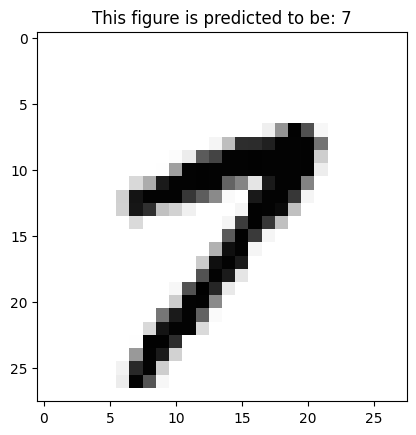

In [19]:
# 指定编号 (0 ~ 59999)
index = 79
img = images[index]
plt.imshow(img.reshape(28, 28), cmap="Greys")
img.shape += (1,)

# 前向传播
h_pre = b_i_h + w_i_h @ img.reshape(784, 1)
h = 1 / (1 + np.exp(-h_pre))
o_pre = b_h_o + w_h_o @ h
o = 1 / (1 + np.exp(-o_pre))
plt.title(f"This figure is predicted to be: {o.argmax()}")
plt.show()